Exploring the Dataset and settling on columns we want to keep

## Exploring Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/globalterrorismdb_0718dist.csv', encoding="latin1")

C:\Users\timor\AppData\Local\Temp\ipykernel_132916\3291374587.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/globalterrorismdb_0718dist.csv', encoding="latin1")


In [23]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [25]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
countries = df['country_txt'].unique()
print(countries)

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

In [28]:
counts = df['country_txt'].value_counts()
print(counts)

country_txt
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: count, Length: 205, dtype: int64


In [18]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: eventid
1: iyear
2: imonth
3: iday
4: approxdate
5: extended
6: resolution
7: country
8: country_txt
9: region
10: region_txt
11: provstate
12: city
13: latitude
14: longitude
15: specificity
16: vicinity
17: location
18: summary
19: crit1
20: crit2
21: crit3
22: doubtterr
23: alternative
24: alternative_txt
25: multiple
26: success
27: suicide
28: attacktype1
29: attacktype1_txt
30: attacktype2
31: attacktype2_txt
32: attacktype3
33: attacktype3_txt
34: targtype1
35: targtype1_txt
36: targsubtype1
37: targsubtype1_txt
38: corp1
39: target1
40: natlty1
41: natlty1_txt
42: targtype2
43: targtype2_txt
44: targsubtype2
45: targsubtype2_txt
46: corp2
47: target2
48: natlty2
49: natlty2_txt
50: targtype3
51: targtype3_txt
52: targsubtype3
53: targsubtype3_txt
54: corp3
55: target3
56: natlty3
57: natlty3_txt
58: gname
59: gsubname
60: gname2
61: gsubname2
62: gname3
63: gsubname3
64: motive
65: guncertain1
66: guncertain2
67: guncertain3
68: individual
69: nperps
70: nperpcap
71: claimed

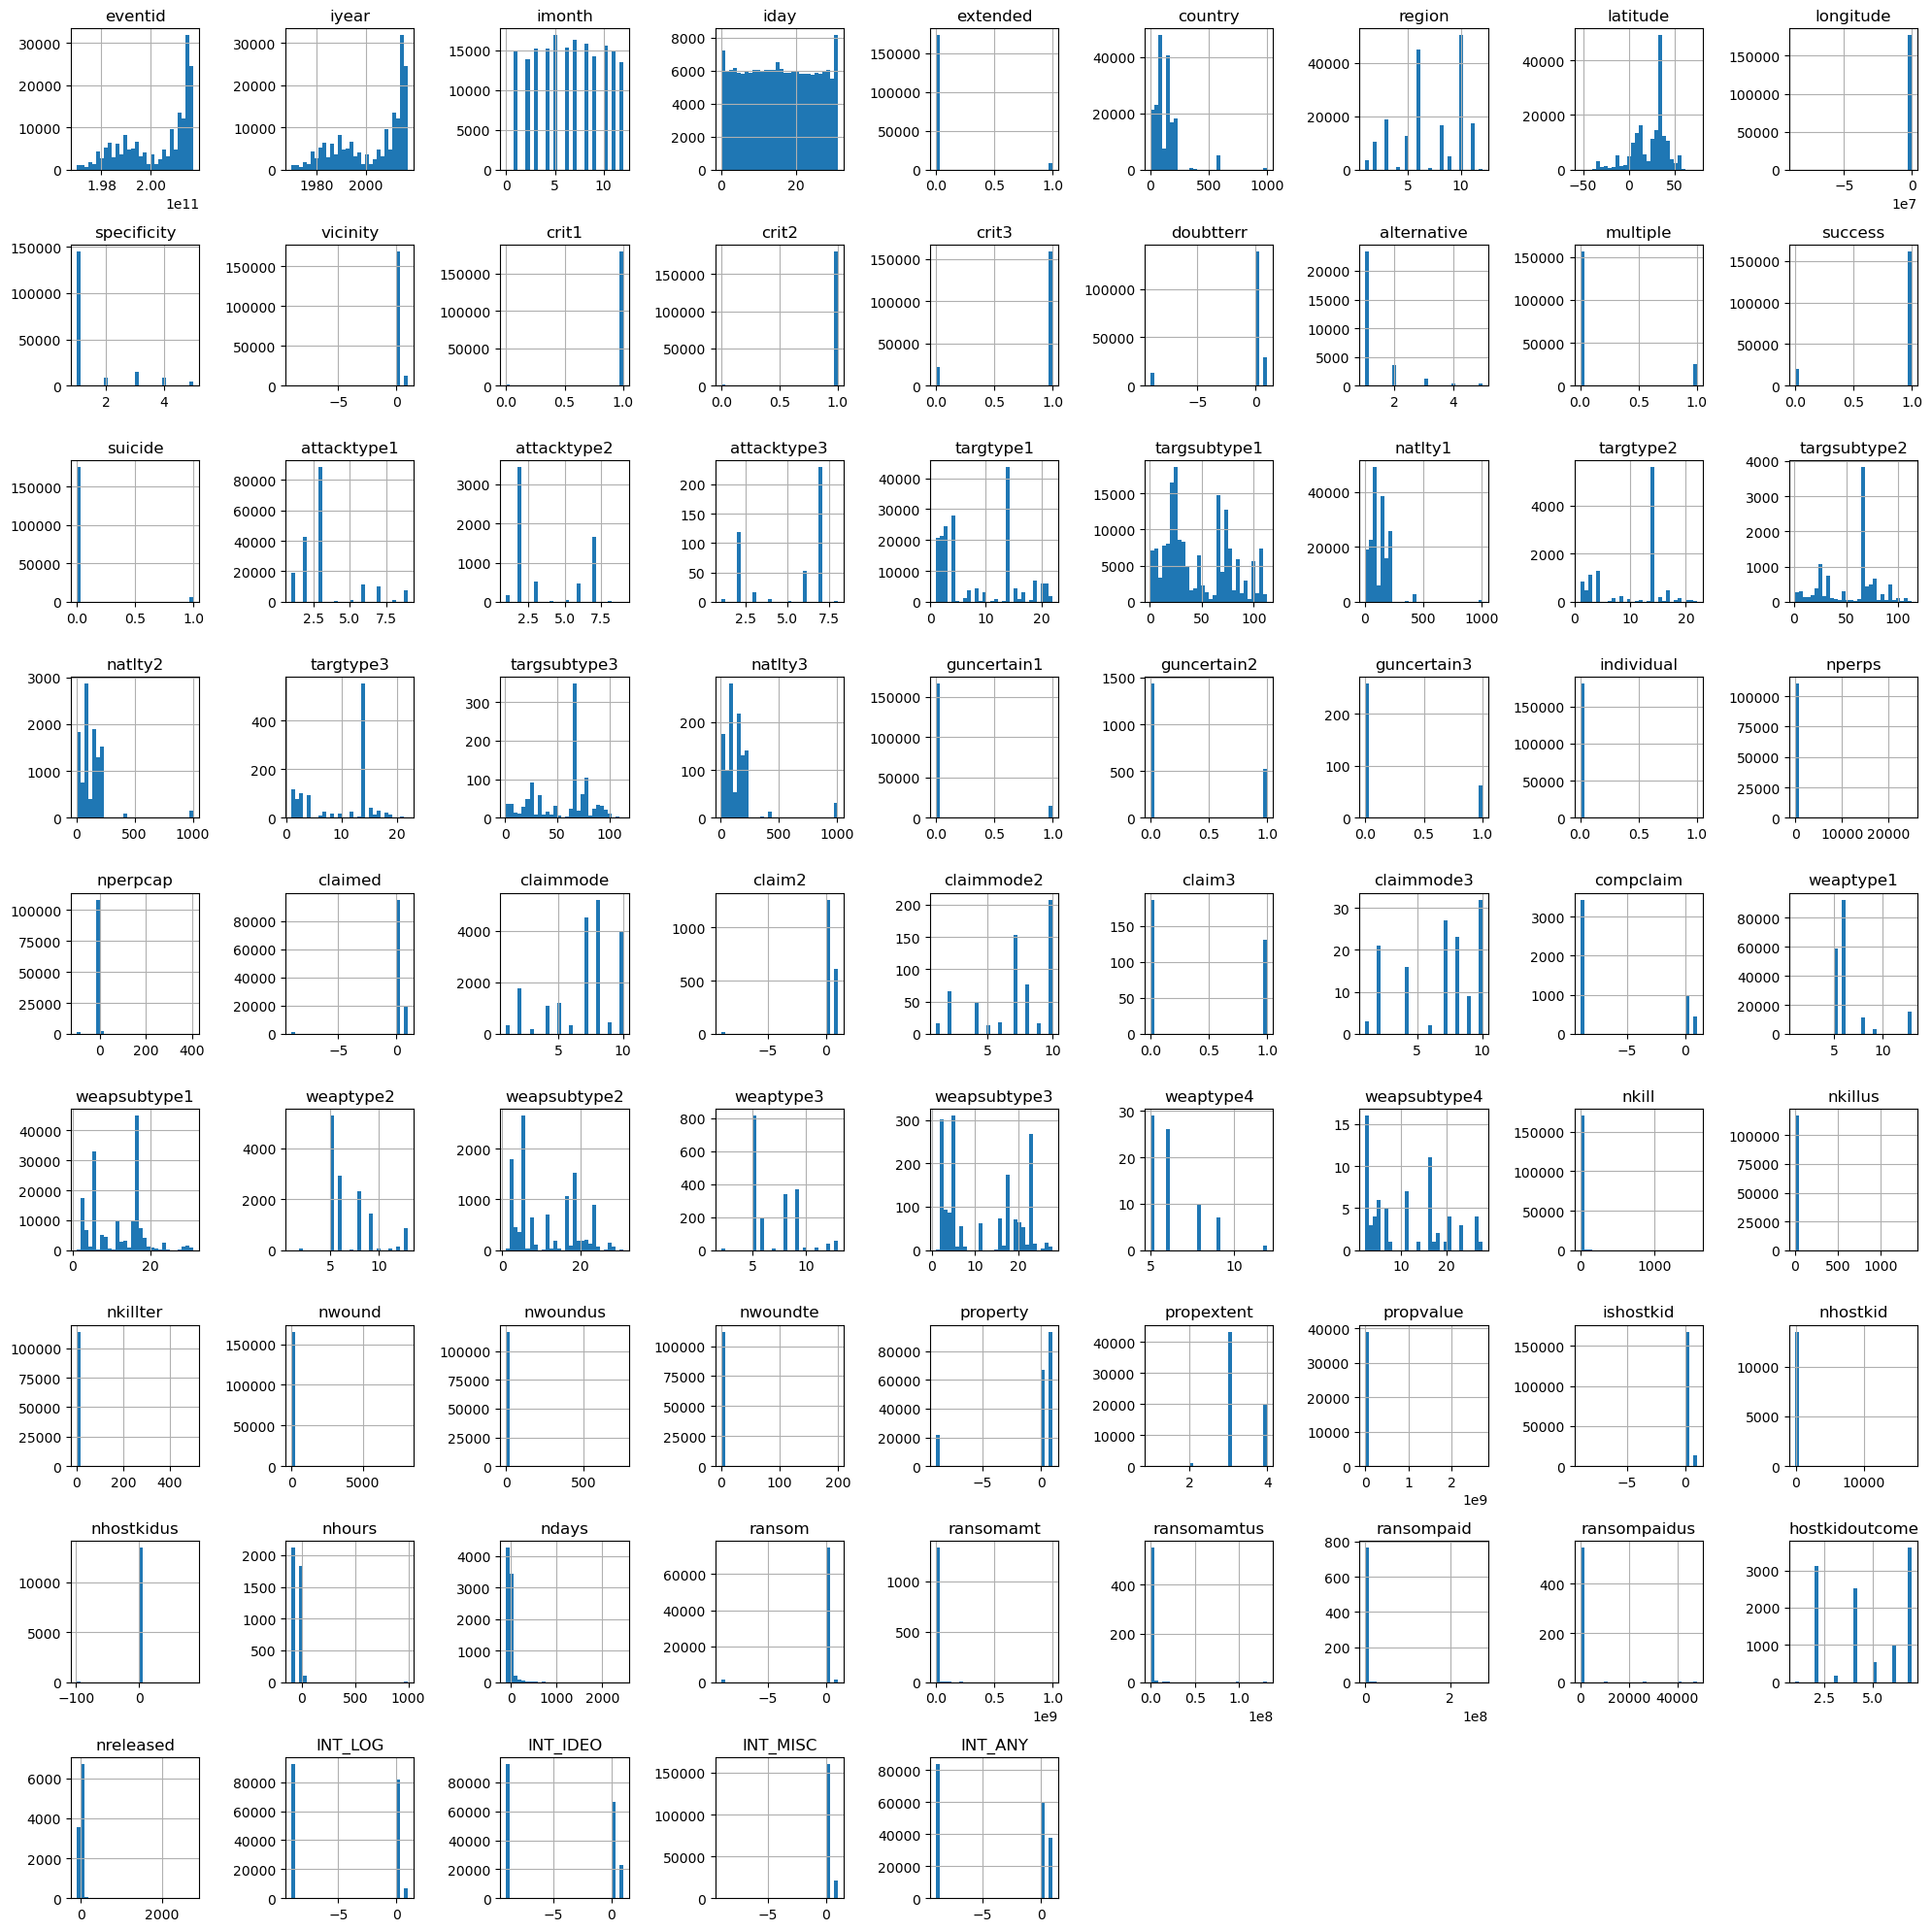

In [ ]:
num = df.select_dtypes(include='number')
num.hist(figsize=(20, 20), bins=30) 
plt.tight_layout();

In [19]:
columns_to_keep = [
        'iyear',
        'country_txt',
        'attacktype1_txt',
        'nkill',
        'nwound',
        'gname',
        'targtype1_txt',
        'weaptype1_txt'
    ]

df = df[columns_to_keep].copy()

    # Fehlende Werte bereinigen
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

    # Gesamte Opferzahl berechnen
df['casualties'] = df['nkill'] + df['nwound']

df

,iyear,country_txt,attacktype1_txt,nkill,nwound,gname,targtype1_txt,weaptype1_txt,casualties
0,1970,Dominican Republic,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown,1.0
1,1970,Mexico,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown,0.0
2,1970,Philippines,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown,1.0
3,1970,Greece,Bombing/Explosion,0.0,0.0,Unknown,Government (Diplomatic),Explosives,0.0
4,1970,Japan,Facility/Infrastructure Attack,0.0,0.0,Unknown,Government (Diplomatic),Incendiary,0.0
...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Armed Assault,1.0,2.0,Al-Shabaab,Military,Firearms,3.0
181687,2017,Syria,Bombing/Explosion,2.0,7.0,Muslim extremists,Military,Explosives,9.0
181688,2017,Philippines,Facility/Infrastructure Attack,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,0.0
181689,2017,India,Bombing/Explosion,0.0,0.0,Unknown,Government (General),Explosives,0.0


array([[<Axes: title={'center': 'iyear'}>,
        <Axes: title={'center': 'nkill'}>],
       [<Axes: title={'center': 'nwound'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

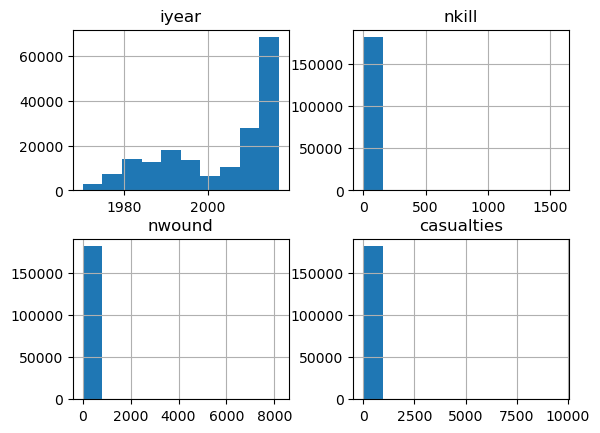

In [20]:
df.hist()